In [1]:

import tensorflow as tf
import keras as keras

print(tf.__version__)

2.17.0


* Fashion MNIST: tf.keras.datasets.fashion_mnist.load_data()

* (x_train, y_train), (x_test, y_test) = load_data()

* X.shape = Nx28x28 grayscale image
  - Not the right shape for CNN: CNN expects NxHxWxc
  - We must reshape to Nx28x28x1

* CIFAR-10: tf.keras.datasets.cifar10.load_data()

* (x_train, y_train), (x_test, y_test) = load_data()

* Data: Nx32x32x3, pixel values 0...255
  - Slight inconvenience: labels are Nx1
  - Just call `flatten()` to fix it

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0 # normalize the pixel values of the images

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [4]:
# The data is only 2D
# convolution expects height x width x color
# changing their shape from (num_samples, height, width) to (num_samples, height, width, 1).
# The -1 argument specifies that the new dimension should be added as the last dimension. 
# This turns each image from a shape of (28, 28) to (28, 28, 1), indicating that it is a single-channel (grayscale) image.
# 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
 # number of classes
# determining the number of unique classes in the y_train
# The set() function in Python creates a collection of unique elements from y_train. 
# This removes any duplicate values, leaving only the distinct class labels.
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
print(x_train[0].shape)

(28, 28, 1)


In [9]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # 32 filters of 3x3 size filter; The first convolutional layer (Conv2D) takes input i.
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) 
# The strides=2 argument reduces the spatial dimensions (width and height) of the feature maps by approximately half, similar to the effect of pooling.
# If the input feature map has dimensions 28×28, applying a convolution layer with strides=2 results in an output feature map of approximately 14×14.
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x) # Flattens the 2D feature maps from convolutional layers into a 1D vector before Dense layer
x = Dropout(.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x) # Creates a Keras model by specifying the input tensor (i) and output tensor (x).

In [10]:
# compile and fit
# NOTE: make sure you are using the GPU for this!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5216 - accuracy: 0.8057 - val_loss: 0.3898 - val_accuracy: 0.8577
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3643 - accuracy: 0.8645 - val_loss: 0.3380 - val_accuracy: 0.8737
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3127 - accuracy: 0.8838 - val_loss: 0.3287 - val_accuracy: 0.8799
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2780 - accuracy: 0.8953 - val_loss: 0.3065 - val_accuracy: 0.8867
Epoch 5/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2552 - accuracy: 0.9040 - val_loss: 0.3047 - val_accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2348 - accuracy: 0.9107 - val_loss: 0.2874 - val_accuracy: 0.8945
Epoch 7/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2176 - accuracy: 0.9159 - val_loss: 0.2993 - val_accuracy:

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt

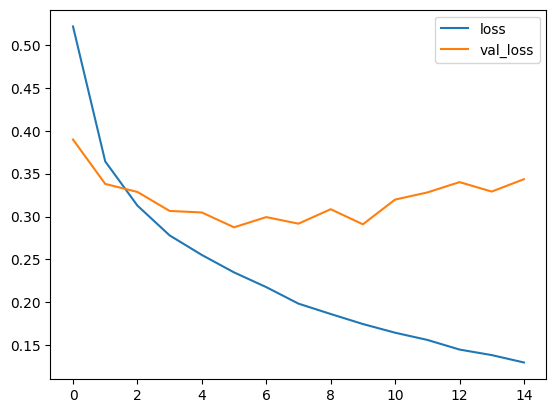

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

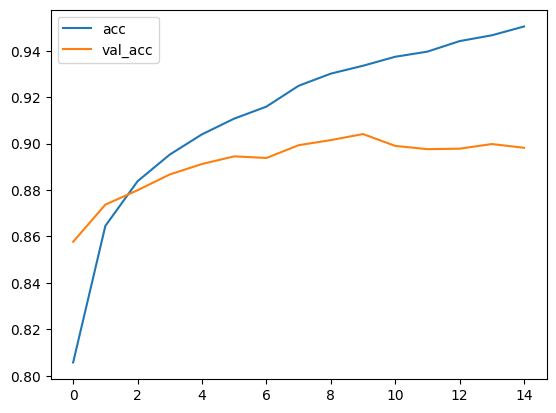

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalizaiton
[[889   0  24  15   3   1  60   0   8   0]
 [  5 972   1  14   5   0   1   0   2   0]
 [ 16   1 881   7  32   0  60   0   3   0]
 [ 11   6  24 911  31   0  14   1   2   0]
 [  1   1  93  31 776   0  96   0   2   0]
 [  1   0   0   1   0 974   0  13   1  10]
 [138   0  81  28  71   0 671   0  11   0]
 [  0   0   0   0   0  18   0 956   0  26]
 [  6   1   6   0   2   2   2   2 979   0]
 [  1   0   0   0   0   5   0  21   0 973]]


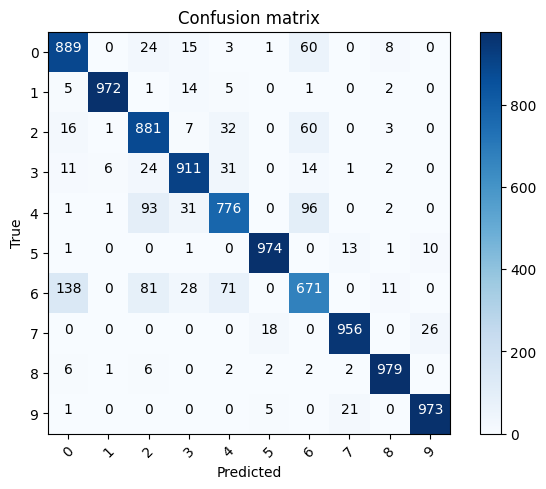

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """ 
    This funciton prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalizaiton')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
# [0.1, 0.3, 0.6].argmax(axis=1) => 2
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [16]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

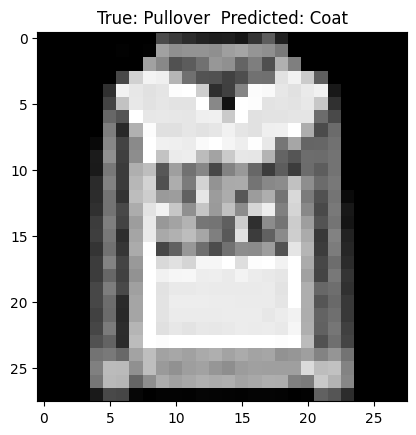

In [21]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0] # always 0 here
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True: %s  Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# CIFAR-10

In [44]:
cifar10 = tf.keras.datasets.cifar10

In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000,)


* x_train.shape is already Nx32x32x3 format (height x width x color)

In [46]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [30]:
x_train[0].shape

(32, 32, 3)

In [32]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # 32 filters of 3x3 size filter; The first convolutional layer (Conv2D) takes input i.
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) 
# The strides=2 argument reduces the spatial dimensions (width and height) of the feature maps by approximately half, similar to the effect of pooling.
# If the input feature map has dimensions 28×28, applying a convolution layer with strides=2 results in an output feature map of approximately 14×14.
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # Higher layers needs more filters to represent the diverse and complex patterns
x = Flatten()(x) # Flattens the 2D feature maps from convolutional layers into a 1D vector before Dense layer
x = Dropout(.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x) # Creates a Keras model by specifying the input tensor (i) and output tensor (x).

In [33]:
# compile and fit
# NOTE: make sure you are using the GPU for this!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4975 - accuracy: 0.4568 - val_loss: 1.2332 - val_accuracy: 0.5532
Epoch 2/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1579 - accuracy: 0.5867 - val_loss: 1.0439 - val_accuracy: 0.6234
Epoch 3/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0049 - accuracy: 0.6445 - val_loss: 0.9631 - val_accuracy: 0.6588
Epoch 4/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8838 - accuracy: 0.6863 - val_loss: 0.9246 - val_accuracy: 0.6708
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7884 - accuracy: 0.7207 - val_loss: 0.9037 - val_accuracy: 0.6848
Epoch 6/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6954 - accuracy: 0.7529 - val_loss: 0.9183 - val_accuracy: 0.6821
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6158 - accuracy: 0.7797 - val_loss: 0.8693 -

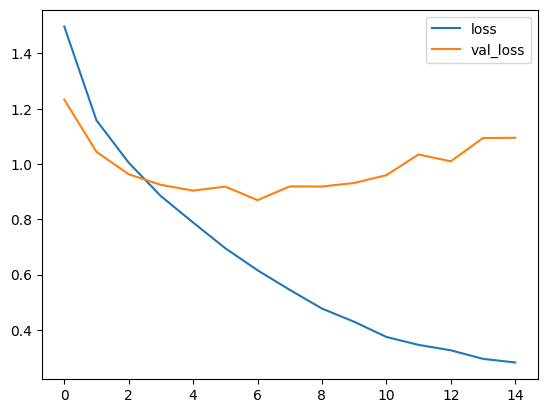

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

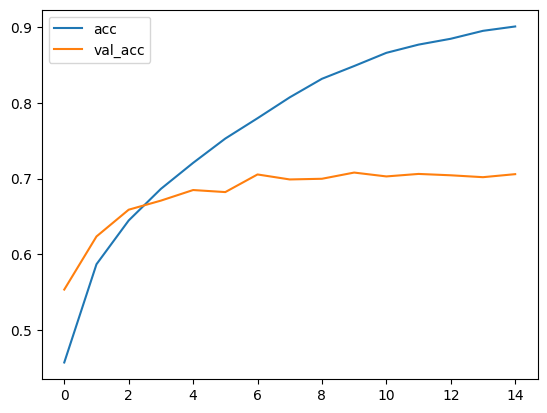

In [35]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalizaiton
[[761  14  41  12   7   6  10  13  90  46]
 [ 12 814   4  12   3   2  11   3  43  96]
 [ 69   8 598  79  72  64  48  26  22  14]
 [ 30  15  78 533  74 144  46  36  20  24]
 [ 24   6  85  76 630  38  38  76  21   6]
 [ 22   5  64 202  43 565  27  50   7  15]
 [  6   9  34  76  45  26 776   8  13   7]
 [ 18   3  30  48  56  53  14 758   3  17]
 [ 48  28  19  19   6   1   4   4 850  21]
 [ 36  90  11  24   6   6  10  11  33 773]]


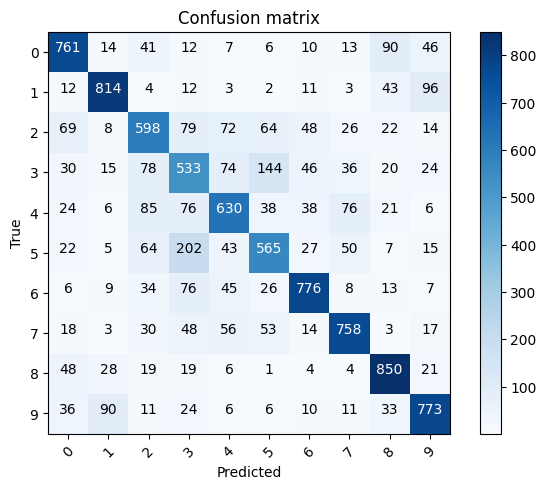

In [36]:
p_test = model.predict(x_test).argmax(axis=1)
# [0.1, 0.3, 0.6].argmax(axis=1) => 2
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [37]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

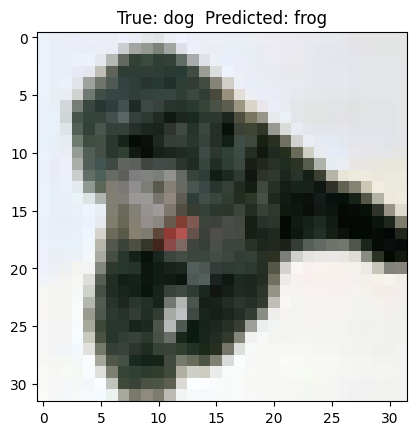

In [42]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0] # always 0 here
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True: %s  Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

## How to improve CIFAR?

In [48]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) # 32 filters of 3x3 size filter
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) # 32 filters of 3x3 size filter
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# The strides=2 argument reduces the spatial dimensions (width and height) of the feature maps by approximately half, similar to the effect of pooling.
# If the input feature map has dimensions 28×28, applying a convolution layer with strides=2 results in an output feature map of approximately 14×14.
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) # Higher layers needs more filters to represent the diverse and complex patterns
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) # Higher layers needs more filters to represent the diverse and complex patterns
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x) # Flattens the 2D feature maps from convolutional layers into a 1D vector before Dense layer
x = Dropout(.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x) # Creates a Keras model by specifying the input tensor (i) and output tensor (x).

In [49]:
# compile and fit
# NOTE: make sure you are using the GPU for this!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3679 - accuracy: 0.5253 - val_loss: 1.1076 - val_accuracy: 0.6092
Epoch 2/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9311 - accuracy: 0.6741 - val_loss: 0.8609 - val_accuracy: 0.7081
Epoch 3/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7634 - accuracy: 0.7352 - val_loss: 0.8523 - val_accuracy: 0.7105
Epoch 4/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6425 - accuracy: 0.7779 - val_loss: 1.8692 - val_accuracy: 0.5597
Epoch 5/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5446 - accuracy: 0.8125 - val_loss: 0.7304 - val_accuracy: 0.7597
Epoch 6/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4672 - accuracy: 0.8391 - val_loss: 0.7445 - val_accuracy: 0.7696
Epoch 7/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3989 - accuracy: 0.8616 - val_loss: 0.6449 -